In [58]:
import numpy as np
import numpy.linalg as la
np.set_printoptions(suppress=True)

In [ ]:
#assume having 100 user 
#obtain rank vector that at first it would be all on ones
def rank_fn(L):

  n=L.shape[0]
  r=100*(np.ones(n)/n)
  last=r
  r=L@r
  i=0
  while la.norm(last-r>0.01):
    last=r
    r=L@r
    i=i+1
  print(str(i+1)+" iterations to obtain the rank vector r : "+str(r))
  return r
  

In [59]:
########################## Rank Via Eig Built in Function #########################

def rank_with_eig(L):
  evl,evc=la.eig(L)
  order=np.absolute(evl).argsort()[::-1]
  evl=evl[order]
  evc=evc[:,order]
  r=evc[:,0]
  print( 100*np.real(r/np.sum(r)))
  return r



In [60]:
# obtain link matrix of internet.png
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])
rank_fn(L)
rank_with_eig(L)

18 iterations to obtain the rank vector r : [15.99756075  5.33432301 40.003013   25.33387147  0.         13.33123177]
[16.          5.33333333 40.         25.33333333  0.         13.33333333]


array([0.30769231+0.j, 0.1025641 +0.j, 0.76923077+0.j, 0.48717949+0.j,
       0.        +0.j, 0.25641026+0.j])

In [63]:
#iTest of internet2.png
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   1/2, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 1/2, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   0, 0 ],
               [0,   0,   0,   0, 0,   1/2, 1 ]])
rank_fn(L2)

16 iterations to obtain the rank vector r : [ 13.71254905   4.57086111  34.29420011  21.71138463   0.
  11.42529081 103.60081163]


array([ 13.71254905,   4.57086111,  34.29420011,  21.71138463,
         0.        ,  11.42529081, 103.60081163])

In [50]:
def rank_with_d(L,d):
  n=L.shape[0]
  M=d*L+(1-d)/n*np.ones(n)
  r=100*(np.ones(n)/n)
  last=r
  r=M@r
  i=0
  while la.norm(last-r>0.01):
    last=r
    r=M@r
    i=i+1
  print(str(i+1)+" iterations to obtain the rank vector r : "+str(r))
  return r

  

In [52]:
rank_with_d(L,0.1)
rank_with_d(L2,0.1)

3 iterations to obtain the rank vector r : [16.44552469 16.29830247 18.91496914 17.71049383 15.         15.63070988]
2 iterations to obtain the rank vector r : [14.19104308 14.0600907  16.3100907  15.26643991 12.94897959 13.48866213
 15.11564626]


array([14.19104308, 14.0600907 , 16.3100907 , 15.26643991, 12.94897959,
       13.48866213, 15.11564626])

3 iterations to obtain the rank vector r : [16.44552469 16.29830247 18.91496914 17.71049383 15.         15.63070988]
Populating the interactive namespace from numpy and matplotlib


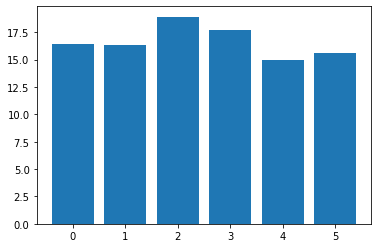

In [56]:
#plot r
r=rank_with_d(L,0.1)
%pylab inline
plt.bar(arange(r.shape[0]), r);

